In [1]:
import sys
import os
sys.path.append('.\\neurokin\\')
#import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from neurokin.kinematic_data import KinematicDataRun
from neurokin.neural_data import NeuralData
from neurokin.utils.neural import processing, neural_plot

## Experiment settings and runs to analyze

In [3]:
GAIT_PATH = "./neurokin/test_data/"
NEURAL_PATH = "./temp_data/neural/220915/ENWE_00052-220915-153059/"
CONFIGPATH = "./config.yaml"
GAIT_RECORDING_FS = 200
output_folder = "./"

## Reference markers and correction parameters.

The axis can be tilted or shifted (tilting of the runway, setting the origin in the middle..) so we set one reference marker on which to compute the linear trend of the tilt, and one for the shifting, then indicate all the columns that should be corrected for either. 

Finally we set which markers should be use to partition the steps.

In [4]:
shift_reference_marker = "lmtp_y"
tilt_reference_marker = "lmtp_z"
to_tilt = ["rshoulder_z", "rcrest_z", "rhip_z",
           "rknee_z", "rankle_z", "rmtp_z",
           "lshoulder_z", "lcrest_z", "lhip_z",
           "lknee_z", "lankle_z", "lmtp_z"]
to_shift = ["rshoulder_y", "rcrest_y", "rhip_y",
            "rknee_y", "rankle_y", "rmtp_y",
            "lshoulder_y", "lcrest_y", "lhip_y",
            "lknee_y", "lankle_y", "lmtp_y"]

step_left_marker = "lmtp"
step_right_marker = "rmtp"

## Get file names
Running through the selected folder to grab the names of all the .c3d files

In [5]:
c3d_files = []
for file in os.listdir(GAIT_PATH):
    if file.endswith(".c3d"):
        c3d_files.append(GAIT_PATH + file)
file = c3d_files[0]

## Here is where the magic happens.

- Runs through the files to analyze
- creates an object for each run, corrects the tilt and the shift
- computes the gait cycles bounds and prints it to a file for inspection
- computes all the angle joints set in the config file
- saves to csv

In [6]:
kin_data = KinematicDataRun(file, CONFIGPATH)       # creating a single run obj
kin_data.load_kinematics()

kin_data.compute_gait_cycles_bounds(left_marker=step_left_marker,   # computing left right bounds of steps
                                    right_marker=step_right_marker)
kin_data.print_step_partition(step_left_marker, step_right_marker, output_folder)  # print step partition for inspection only

kin_data.get_c3d_compliance()

(<AxesSubplot:title={'center':'Left side'}>,
 <AxesSubplot:title={'center':'Right side'}>)

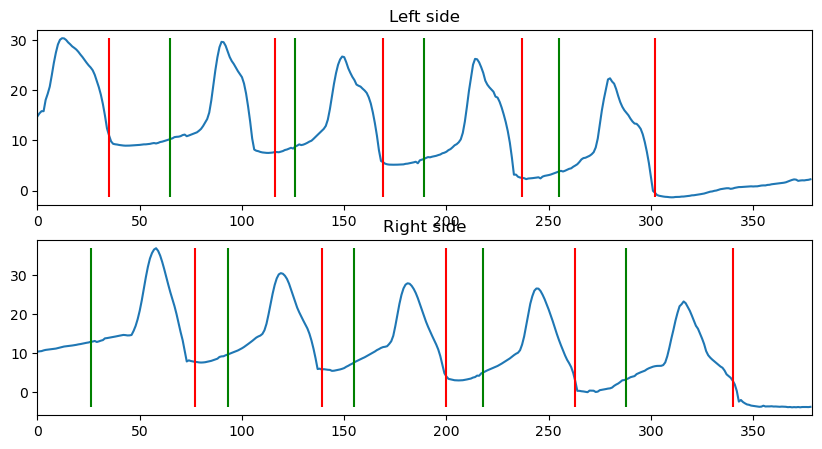

In [7]:
fig, axs = plt.subplots(2,1, figsize=(10,5))
kin_data.plot_step_partition(step_left_marker, step_right_marker, ax_l=axs[0], ax_r=axs[1])

In [10]:
kin_data.extract_features()

<class 'dict'>
{'window_size': 10}


In [11]:
kin_data.features_df

scorer            scorer                                               \
bodyparts            *15                                          *14   
coords    x_sliding_mean y_sliding_mean z_sliding_mean x_sliding_mean   
0                    NaN            NaN            NaN            NaN   
1                    NaN            NaN            NaN            NaN   
2                    NaN            NaN            NaN            NaN   
3                    NaN            NaN            NaN            NaN   
4                    0.0            0.0            0.0            0.0   
..                   ...            ...            ...            ...   
374                  0.0            0.0            0.0            0.0   
375                  0.0            0.0            0.0            0.0   
376                  0.0            0.0            0.0            0.0   
377                  0.0            0.0            0.0            0.0   
378                  0.0            0.0            0.0            0.0   

scorer                                                                 \
bodyparts                                          *13                  
coords    y_sliding_mean z_sliding_mean x_sliding_mean y_sliding_mean   
0                    NaN            NaN            NaN            NaN   
1                    NaN            NaN            NaN            NaN   
2                    NaN            NaN            NaN            NaN   
3                    NaN            NaN            NaN            NaN   
4                    0.0            0.0            0.0            0.0   
..                   ...            ...            ...            ...   
374                  0.0            0.0            0.0            0.0   
375                  0.0            0.0            0.0            0.0   
376                  0.0            0.0            0.0            0.0   
377                  0.0            0.0            0.0            0.0   
378                  0.0            0.0            0.0            0.0   

scorer                                   ...                                \
bodyparts                           *12  ...      lshoulder           rmtp   
coords    z_sliding_mean x_sliding_mean  ... z_sliding_mean x_sliding_mean   
0                    NaN            NaN  ...            NaN            NaN   
1                    NaN            NaN  ...            NaN            NaN   
2                    NaN            NaN  ...            NaN            NaN   
3                    NaN            NaN  ...            NaN            NaN   
4                    0.0            0.0  ...      64.737143     125.497142   
..                   ...            ...  ...            ...            ...   
374                  0.0            0.0  ...      52.611400     127.358073   
375                  0.0            0.0  ...      52.523074     127.343565   
376                  0.0            0.0  ...      52.414931     127.340520   
377                  0.0            0.0  ...      52.290846     127.315752   
378                  0.0            0.0  ...      52.153030     127.322511   

scorer                                                                 \
bodyparts                                         rhip                  
coords    y_sliding_mean z_sliding_mean x_sliding_mean y_sliding_mean   
0                    NaN            NaN            NaN            NaN   
1                    NaN            NaN            NaN            NaN   
2                    NaN            NaN            NaN            NaN   
3                    NaN            NaN            NaN            NaN   
4            -436.843005      10.565651     116.029781    -431.123041   
..                   ...            ...            ...            ...   
374           495.541943      -3.873614     115.683380     481.154620   
375           495.556451      -3.867450     115.991313     481.646405   
376           495.565552      -3.853902     116.319835    

## Example for `FeatureExtraction` subclass:

(implementation in KinematicDataRun pending)

In [ ]:
from neurokin.features.extraction_strategies import SampleFeatureExtractionStrategy

In [ ]:
# as the implementation in the KinematicDataRun class is still pending:
df = kin_data.markers_df.copy()

In [ ]:
SampleFeatureExtractionStrategy.sliced_marker_df

In [ ]:
# without passing any params, defaults will be used:
feature_extraction_strat = SampleFeatureExtractionStrategy(sliced_marker_df=df)
extracted_features_df = feature_extraction_strat.extract_features(source_marker_ids=['lshoulder', 'rmtp'])
extracted_features_df.head(10)

In [ ]:
# with user-defined parameters:
params = {'window_size': 5, 'aggregation_method': 'sum'}
feature_extraction_strat = SampleFeatureExtractionStrategy(sliced_marker_df=df)
extracted_features_df = feature_extraction_strat.extract_features(source_marker_ids=['lshoulder', 'rmtp'])
extracted_features_df.head(10)

In [ ]:
# with invalid params:
params = {'window_size': 3.4}
feature_extraction_strat = SampleFeatureExtractionStrategy(sliced_marker_df=df, params = params)
extracted_features_df = feature_extraction_strat.extract_features(source_marker_ids=['lshoulder', 'rmtp'])
extracted_features_df.head(10)

## `KinematicDataRun` has to do:

- from the config.yaml, extract:

    - what feature extraction strategies (i.e. class names referring to feature extraction options in the neurkin.features.extraction_strategies module) shall be run
    - what parameters need to be passed (there might be none, either if there are no adjustable parameters for that feature extraction strategy, or if only default values shall be used)
    - what marker_ids are supposed to be used (the config may state either that either "all_marker_ids", only a list of specific marker_ids, or a marker_subset defined in skeleton shall be used)
    
- with these information, loop over all feature extraction strategies that are supposed to run and:
    - instantiate the corresponding object passing the df and params (calling the corresponding constructor, which is inherited from the FeatureExtraction class)
    - call the ".extract_features() method, passing the list of identified marker_ids (skeleton references won't work, this needs to be handled by KinematicDataRun and converted into a list of actually existing marker_ids in the markers_df)
    - concatenate the outputted dataframes that contains only the extracted feature columns to either the .markers_df or to a separate attribute .extracted_features_df

#### How the "run feature extraction" method should more or less look like:

In [ ]:
# At this point, KinematicDataRun would have already extract the following three things based on the config.yaml:
feature_extraction_strategy = SampleFeatureExtractionStrategy
params = {'window_size': 3}
source_marker_ids = ['lshoulder', 'rmtp']

# Then it could look like:
feature_extraction_strat = feature_extraction_strategy(sliced_marker_df=df, params = params)
extracted_features_df = feature_extraction_strat.extract_features(source_marker_ids=source_marker_ids)
extracted_features_df.head()

# Neural analysis

The basics: *NeuralData*


In [ ]:
neural_data = NeuralData(path=NEURAL_PATH)
neural_data.load_tdt_data(stream_name="NPr1", sync_present=True, stim_stream_name="Wav1")
neural_data.pick_sync_data(0)

In [ ]:
MIN_FOI = 10


MIN_POINTS = int(neural_data.fs * 1/(MIN_FOI/2))
POWER = MIN_POINTS.bit_length()
NFFT = 2**(POWER+2)


In [ ]:
%matplotlib inline

In [ ]:
nfft= 2**13
NOV = nfft/8
freq, pxx = processing.calculate_power_spectral_density(neural_data.raw[5], neural_data.fs, 
                                                        nperseg=nfft, noverlap=NOV,
                                                        scaling="spectrum")
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle("A1 Caudal Forelimb Left", fontsize=20)

ax.set_xlim(0,300)
ax.set_ylim(0, 0.6*10**-7)

ax.plot(freq, pxx, linewidth=3)

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))

kin_data.plot_step_partition(step_left_marker, step_right_marker, ax_l=axs[0], ax_r=axs[1])
neural_plot.plot_spectrogram(ax=axs[2], fs=neural_data.fs, raw=neural_data.raw[5], ylim=[0,300], 
                             tick_spacing=50, nfft=nfft, noverlap=NOV)



fig.suptitle("Kinematic and Neural Correlation", fontsize=15)